In [101]:
import pandas as pd
import numpy as np
import seaborn as sns

In [73]:
# analysis related modules
from scipy.stats import entropy, spearmanr
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import KFold, GroupKFold
from sklearn.ensemble import RandomForestRegressor
from collections import Counter

In [74]:
from utils.utils import ci, rocauc, rmse

Using TensorFlow backend.
/home/sjnam/anaconda3/envs/infmtv_keras_gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sjnam/anaconda3/envs/infmtv_keras_gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sjnam/anaconda3/envs/infmtv_keras_gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# import data 

## Kapelner et al., dataset
- fetch column names

In [49]:
df_contexts = pd.read_pickle('dataset/predicting_contextual_informativeness-master/kapelner_context_filtered.pickle')

In [50]:
col_features_all = df_contexts.columns.tolist()[6:-1]

# taking off:  'num_times_target_exact_match', 'num_times_target_stem_match'
# col_features_all.remove('num_times_target_exact_match')
# col_features_all.remove('num_times_target_stem_match')

del(df_contexts)
len(col_features_all)


617

## DSCoVAR lex features 

In [22]:
df_taales = pd.read_csv("dataset/sentences_DSCoVAR/dscovar_lexout/results_taales.csv")
df_taaco  = pd.read_csv("dataset/sentences_DSCoVAR/dscovar_lexout/results_taaco.csv")
df_seance = pd.read_csv("dataset/sentences_DSCoVAR/dscovar_lexout/results_seance.csv")
df_seance.rename(columns={'filename':'Filename'}, inplace=True)

In [23]:
df_taales.head()

,Filename,Word Count,KF_Freq_AW,KF_Freq_AW_Log,KF_Ncats_AW,KF_Nsamp_AW,TL_Freq_AW,TL_Freq_AW_Log,Brown_Freq_AW,Brown_Freq_AW_Log,...,WN_Zscore_FW,WN_SD_FW,WN_Mean_Accuracy_FW,lsa_average_top_three_cosine,lsa_max_similarity_cosine,lsa_average_all_cosine,aoe_inverse_average,aoe_inverse_linear_regression_slope,aoe_index_above_threshold_40,aoe_inflection_point_polynomial
0,dscovar_sent_1196.txt,12,23383.000000,3.015811,12.300000,263.100000,80224.800000,3.828981,3481.285714,2.927603,...,-0.5700,163.5360,1.000,0.318000,0.580000,0.252845,0.251500,0.896709,1.000000,3.408184
1,dscovar_sent_0288.txt,11,16852.444444,3.082863,14.000000,259.666667,60841.400000,3.484174,2647.625000,2.223640,...,-0.6350,126.1425,1.000,0.294000,0.512000,0.185276,0.379278,1.486539,2.500000,5.227749
2,dscovar_sent_1182.txt,13,8756.416667,2.981773,12.833333,306.666667,33795.416667,3.598665,1067.545455,2.100121,...,-0.4700,149.6950,1.000,0.273333,0.405000,0.294162,0.309852,0.937731,2.000000,4.697927
3,dscovar_sent_1633.txt,12,12711.000000,3.391661,14.909091,353.090909,52559.545455,4.065243,2060.909091,2.566909,...,-0.5380,120.5360,0.992,0.156000,0.278000,0.109579,0.262667,0.887637,1.666667,3.435909
4,dscovar_sent_1155.txt,12,12318.363636,3.285592,13.818182,326.000000,52001.090909,3.962394,1729.181818,2.505287,...,-0.5925,118.7075,1.000,0.168333,0.271667,0.196981,0.264104,0.919063,1.000000,3.319064


In [24]:
df_taaco.head()

,Filename,lemma_ttr,lemma_mattr,lexical_density_tokens,lexical_density_types,content_ttr,function_ttr,function_mattr,noun_ttr,verb_ttr,...,negative_logical,all_temporal,positive_intentional,all_positive,all_negative,all_connective,pronoun_density,pronoun_noun_ratio,repeated_content_lemmas,repeated_content_and_pronoun_lemmas
0,dscovar_sent_1196.txt,0.846154,0.846154,0.538462,0.636364,1.0,0.666667,0.666667,1.0,0.0,...,0.0,0.076923,0.0,0.076923,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,dscovar_sent_0288.txt,0.909091,0.909091,0.545455,0.600000,1.0,0.800000,0.800000,1.0,1.0,...,0.0,0.000000,0.0,0.181818,0.0,0.181818,0.000000,0.000000,0.0,0.0
2,dscovar_sent_1182.txt,0.923077,0.923077,0.538462,0.583333,1.0,1.000000,1.000000,1.0,1.0,...,0.0,0.076923,0.0,0.076923,0.0,0.076923,0.076923,0.333333,0.0,0.0
3,dscovar_sent_1633.txt,1.000000,1.000000,0.500000,0.500000,1.0,1.000000,1.000000,1.0,1.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.083333,0.500000,0.0,0.0
4,dscovar_sent_1155.txt,1.000000,1.000000,0.583333,0.583333,1.0,1.000000,1.000000,1.0,1.0,...,0.0,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.333333,0.0,0.0


In [25]:
df_seance.head()

,Filename,nwords,Admiration/Awe_GALC,Amusement_GALC,Anger_GALC,Anxiety_GALC,Beingtouched_GALC,Boredom_GALC,Compassion_GALC,Contempt_GALC,...,virtue_adverbs_component,positive_nouns_component,respect_component,trust_verbs_component,failure_component,well_being_component,economy_component,certainty_component,positive_verbs_component,objects_component
0,dscovar_sent_1196.txt,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.898231,0.000000,0.040750,0.000000,0.305600,0.0,0.117500,0.000000,0.050167
1,dscovar_sent_0288.txt,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.901167,0.178081,0.000000,0.000000,0.336939,0.0,0.000000,0.000000,0.389657
2,dscovar_sent_1182.txt,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.116308,0.000000,0.339663,0.0,0.043462,0.000000,0.000000
3,dscovar_sent_1633.txt,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.316125,0.000000,0.129500,0.0,0.141250,0.943308,0.000000
4,dscovar_sent_1155.txt,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.655333,0.479125,0.0,0.117500,-0.872000,0.050167


In [88]:
df_dscovar_lex = pd.merge(df_seance, pd.merge(df_taales, df_taaco, on='Filename'), on='Filename')
df_dscovar_lex = df_dscovar_lex[['Filename']+[col for col in df_dscovar_lex.columns if col in col_features_all]]
df_dscovar_lex = df_dscovar_lex.sort_values(by='Filename')
df_dscovar_lex = df_dscovar_lex.reset_index(drop=True)

In [89]:
df_cloze = pd.read_pickle('./dataset/cloze_df_scores_all3.pickle')

mm_scaler = MinMaxScaler()
resp_scores = mm_scaler.fit_transform(df_cloze[['ent_cloze', 
                                                'elmo_score', 'bert_score', 'glove_score',
                                                'scores_sum', 'sent_len']])
resp_lex = resp_scores[:, 0]
resp_lex = 1-resp_lex # reversing the direction: high score for high informative sentences

resp_brt = resp_scores[:, 1]
resp_lmo = resp_scores[:, 2]
resp_glv = resp_scores[:, 3]
resp_bws = resp_scores[:, 4]
sent_len = resp_scores[:, 5]

/home/sjnam/anaconda3/envs/infmtv_keras_gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [90]:
df_dscovar_lex['target_word'] = df_cloze['targ'].copy()
df_dscovar_lex['resp_bws'] = resp_bws
df_dscovar_lex['resp_glv'] = resp_glv

In [91]:
df_dscovar_lex.shape # far less number of features...

(1783, 286)

In [92]:
col_dscovar_lex = df_dscovar_lex.columns[1:-3]

In [93]:
col_dscovar_lex

Index(['nwords', 'Admiration/Awe_GALC', 'Amusement_GALC', 'Anger_GALC',
       'Anxiety_GALC', 'Beingtouched_GALC', 'Boredom_GALC', 'Compassion_GALC',
       'Contempt_GALC', 'Contentment_GALC',
       ...
       'content_ttr', 'function_ttr', 'conjunctions', 'disjunctions',
       'addition', 'order', 'opposition', 'determiners', 'pronoun_noun_ratio',
       'repeated_content_lemmas'],
      dtype='object', length=282)

In [94]:
df_dscovar_lex.head()

,Filename,nwords,Admiration/Awe_GALC,Amusement_GALC,Anger_GALC,Anxiety_GALC,Beingtouched_GALC,Boredom_GALC,Compassion_GALC,Contempt_GALC,...,disjunctions,addition,order,opposition,determiners,pronoun_noun_ratio,repeated_content_lemmas,target_word,resp_bws,resp_glv
0,dscovar_sent_0000.txt,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.200000,0.000000,0.0,discord,0.456522,0.203255
1,dscovar_sent_0001.txt,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.100000,0.0,0.0,0.200000,0.000000,0.0,rakish,0.521739,0.158994
2,dscovar_sent_0002.txt,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.090909,0.0,0.0,0.181818,0.000000,0.0,defile,0.500000,0.463422
3,dscovar_sent_0003.txt,10,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.111111,0.333333,0.0,browbeat,0.652174,0.132336
4,dscovar_sent_0004.txt,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.214286,0.250000,0.0,goad,0.695652,0.152213


# Baseline model: RF regression

In [95]:
# setting the bootstrapping sample size for RF models: to follow the setting from the original Kapelner et al., paper
# https://stackoverflow.com/questions/44955555/how-can-i-set-sub-sample-size-in-random-forest-classifier-in-scikit-learn-espec
from sklearn.ensemble import forest

def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

In [96]:
gkf1 = GroupKFold(n_splits=10) ## target words

## SemDen score

In [114]:
gkf1 = GroupKFold(n_splits=10) ## target words

In [115]:
reset_rf_samples()
set_rf_samples(10000)
gkf_split = gkf1.split(df_dscovar_lex['Filename'], groups=df_dscovar_lex['target_word'])

rfreg_all_preds = []
rfreg_all_score = []
for train_idx, test_idx in gkf_split:
    rfreg_all = RandomForestRegressor(random_state=0, n_estimators=500, n_jobs=-3)
    rfreg_all.fit(df_dscovar_lex.iloc[train_idx][col_dscovar_lex], df_dscovar_lex.iloc[train_idx]['resp_glv'])
    
    rfreg_all_preds.append({"preds":rfreg_all.predict(df_dscovar_lex.iloc[test_idx][col_dscovar_lex ]),
                            "trues":df_dscovar_lex.iloc[test_idx]['resp_glv'].values})    
    rfreg_all_score.append(rfreg_all.score(df_dscovar_lex.iloc[test_idx][col_dscovar_lex], df_dscovar_lex.iloc[test_idx]['resp_glv']))

In [116]:
np.savez("dscovar_rfreg_all_results_glv.npy", preds=rfreg_all_preds, score=rfreg_all_score)

In [117]:
tt = np.load("dscovar_rfreg_all_results_glv.npy.npz", allow_pickle=True)

In [118]:
rfreg_all_preds = tt['preds']
rfreg_all_score = tt['score']

In [119]:
rfreg_all_score

array([-1.52493626e-02, -2.26358211e-01,  1.42815092e-02, -1.79676226e-04,
       -5.51358066e-02, -2.99532859e-01, -8.68489571e-02,  2.13293921e-02,
       -1.02500005e-01,  1.77592940e-02])

In [120]:
ci(rfreg_all_score)

(-0.07324346824797262, -0.15218801374805352, 0.0057010772521082775)

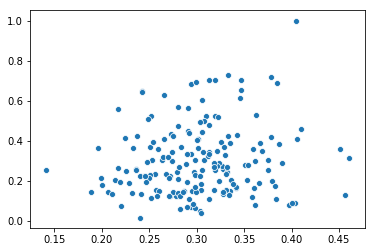

In [121]:
sns.scatterplot(rfreg_all_preds[0]['preds'], rfreg_all_preds[0]['trues'])

In [122]:
{"RMSE": ci([rmse(x['trues'], x['preds']) for x in rfreg_all_preds], digits=3),
 "20low":ci([1-rocauc(x['trues'], x['preds'], .20, "low") for x in rfreg_all_preds], digits=3),
 "50_50":ci([rocauc(x['trues'], x['preds'], .50, "high") for x in rfreg_all_preds], digits=3),
 "20_h": ci([rocauc(x['trues'], x['preds'], .80, "high") for x in rfreg_all_preds], digits=3),}

{'RMSE': (0.167, 0.156, 0.179),
 '20low': (0.563, 0.51, 0.616),
 '50_50': (0.598, 0.567, 0.63),
 '20_h': (0.572, 0.523, 0.62)}

## BWS score 

In [99]:
reset_rf_samples()
set_rf_samples(10000)
gkf_split = gkf1.split(df_dscovar_lex['Filename'], groups=df_dscovar_lex['target_word'])

rfreg_all_preds = []
rfreg_all_score = []
for train_idx, test_idx in gkf_split:
    rfreg_all = RandomForestRegressor(random_state=0, n_estimators=500, n_jobs=-3)
    rfreg_all.fit(df_dscovar_lex.iloc[train_idx][col_dscovar_lex], df_dscovar_lex.iloc[train_idx]['resp_bws'])
    
    rfreg_all_preds.append({"preds":rfreg_all.predict(df_dscovar_lex.iloc[test_idx][col_dscovar_lex ]),
                            "trues":df_dscovar_lex.iloc[test_idx]['resp_bws'].values})    
    rfreg_all_score.append(rfreg_all.score(df_dscovar_lex.iloc[test_idx][col_dscovar_lex], df_dscovar_lex.iloc[test_idx]['resp_bws']))

In [102]:
np.savez("dscovar_rfreg_all_results_bws.npy", preds=rfreg_all_preds, score=rfreg_all_score)

In [103]:
tt = np.load("dscovar_rfreg_all_results_bws.npy.npz", allow_pickle=True)

In [104]:
rfreg_all_preds = tt['preds']
rfreg_all_score = tt['score']

In [105]:
rfreg_all_score

array([0.39411572, 0.42747417, 0.50379134, 0.54153452, 0.48007609,
       0.62024718, 0.3361761 , 0.2834972 , 0.49278555, 0.45754633])

In [106]:
ci(rfreg_all_score)

(0.4537244206956423, 0.3833025811561136, 0.524146260235171)

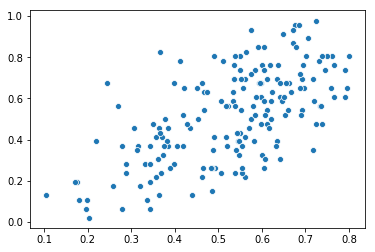

In [107]:
sns.scatterplot(rfreg_all_preds[0]['preds'], rfreg_all_preds[0]['trues'])

In [113]:
{"RMSE": ci([rmse(x['trues'], x['preds']) for x in rfreg_all_preds], digits=3),
 "20low":ci([1-rocauc(x['trues'], x['preds'], .20, "low") for x in rfreg_all_preds], digits=3),
 "50_50":ci([rocauc(x['trues'], x['preds'], .50, "high") for x in rfreg_all_preds], digits=3),
 "20_h": ci([rocauc(x['trues'], x['preds'], .80, "high") for x in rfreg_all_preds], digits=3),}

{'RMSE': (0.156, 0.147, 0.165),
 '20low': (0.864, 0.833, 0.895),
 '50_50': (0.83, 0.805, 0.854),
 '20_h': (0.8, 0.768, 0.832)}